In [1]:
##Import necessary libraries:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
from scipy import stats; from scipy.stats import zscore, norm, randint
from sklearn.impute import SimpleImputer
from matplotlib import cm

from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
##Read data file:
ccdata = pd.read_csv("credit card data.csv")

In [3]:
ccdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
##Checking data quality, distribution of variables:
print(f"Missing values in each variable: \n{ccdata.isnull().sum()}")

Missing values in each variable: 
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [5]:
print(f"Duplicated rows: {ccdata.duplicated().sum()}")

Duplicated rows: 0


In [6]:
print(f"Variable:                  Type: \n{ccdata.dtypes}")

Variable:                  Type: 
Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object


In [7]:
##% point summary:
ccdata.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
#Descriptive Stats & Distributions:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        size_bins = 10
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [9]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        size_bins = 10
        title = x.name
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
    else:
        x = pd.DataFrame(x)

In [10]:
credit=ccdata["Avg_Credit_Limit"]

In [11]:
statistics(credit)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Avg_Credit_Limit,34574.242424,37596.972842,18000.0,1.413532e+09


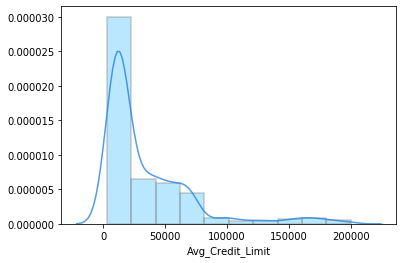

In [12]:
graph_histo(credit)

Observation: Avg_Credit_Limit needs to be scaled, there are definitely outliers, histogram is positively skewed

In [13]:
ccnumber=ccdata["Total_Credit_Cards"]

In [14]:
statistics(ccnumber)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Total_Credit_Cards,4.706061,2.166192,5.0,4.692388


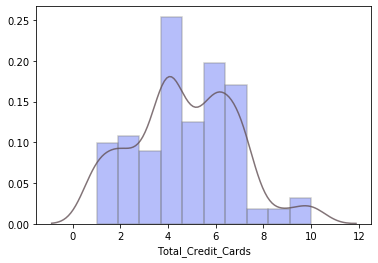

In [15]:
graph_histo(ccnumber)

Observation: Looks a bit random

In [16]:
bankvisits=ccdata["Total_visits_bank"]

In [17]:
statistics(bankvisits)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Total_visits_bank,2.40303,1.630576,2.0,2.658779


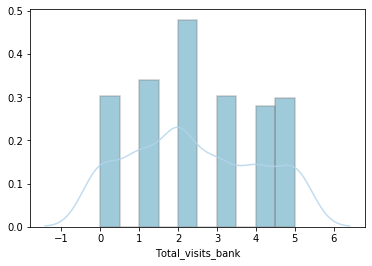

In [18]:
graph_histo(bankvisits)

Observation:  almost a normal distribution with majority of clients making around 2 visits

In [19]:
onlinevisits=ccdata["Total_visits_online"]

In [20]:
statistics(onlinevisits)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Total_visits_online,2.606061,2.933499,2.0,8.605418


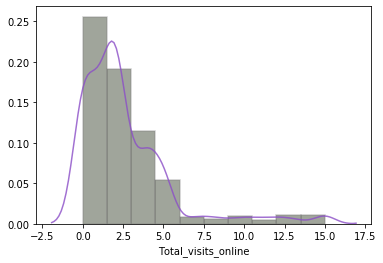

In [21]:
graph_histo(onlinevisits)

Observation: some outliers here, positively skewed histogram

In [22]:
callsmade=ccdata["Total_calls_made"]

In [23]:
statistics(callsmade)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Total_calls_made,3.583333,2.863145,3.0,8.197601


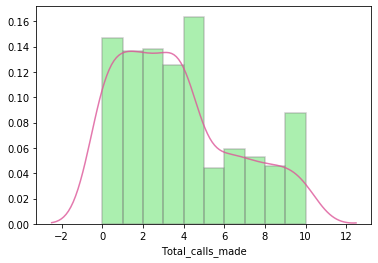

In [24]:
graph_histo(callsmade)

Observation: looks like bimodal, may be divided into 2 groups and analysized separately

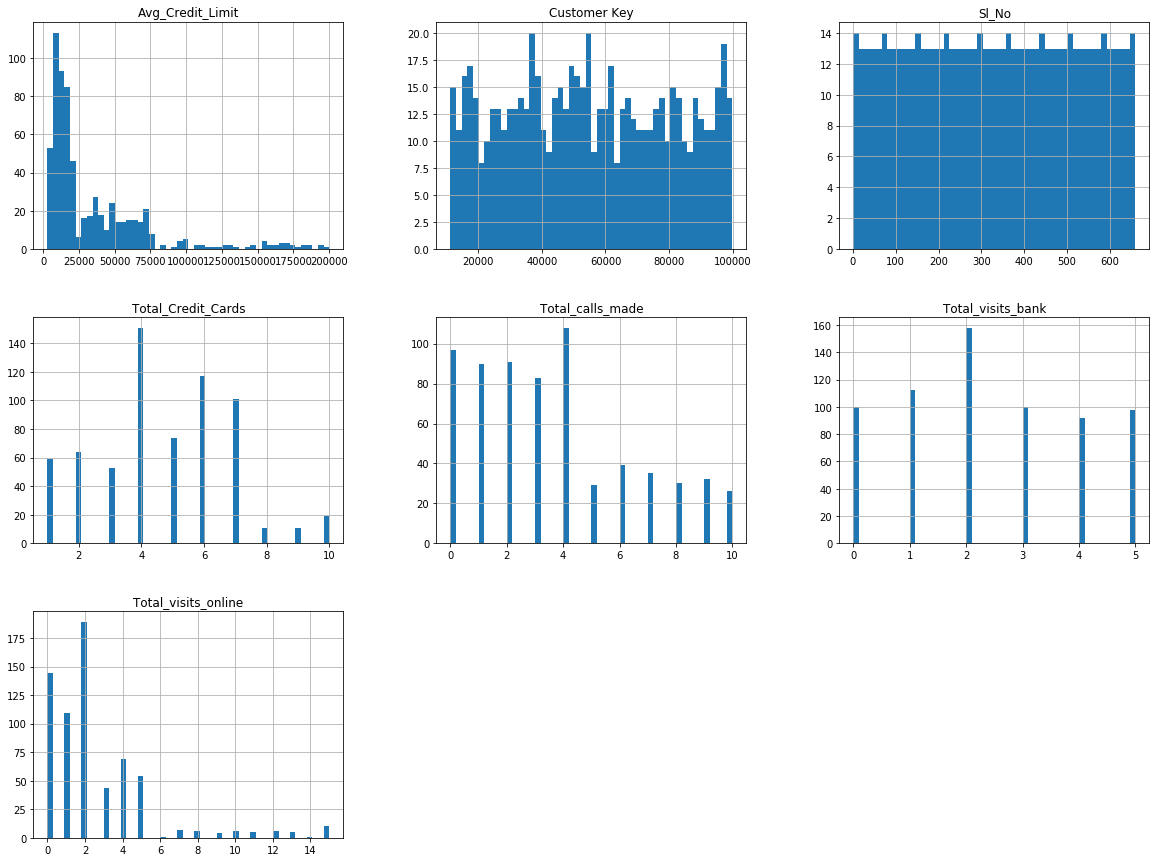

In [25]:
ccdata.hist(bins=50,figsize=(20,15))
plt.savefig("Plots")
plt.show()

Observation: we can drop Customer Key and SI_No, they do not carry any valuable insights and we may create new KPI Average Credit Card Limit per card

In [26]:
ccdata=ccdata.drop(['Customer Key', 'Sl_No'], axis = 1)
ccdata.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [27]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])
    


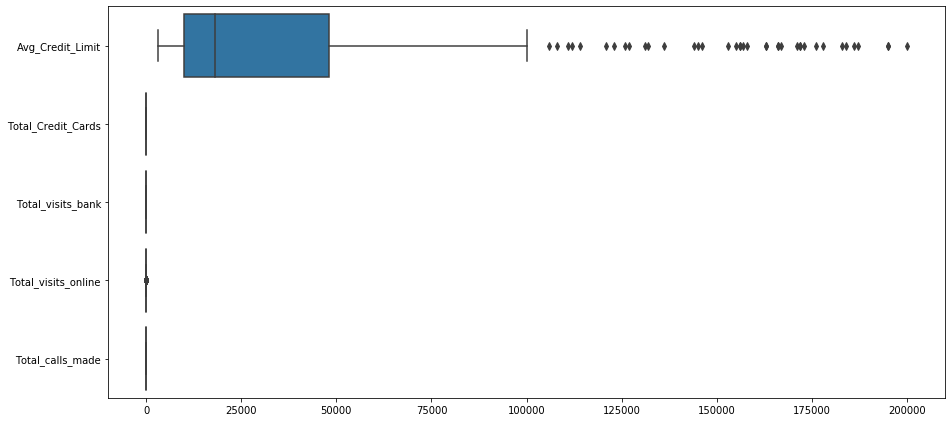

In [28]:
# Columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = ccdata.iloc[:, 0:18], orient = 'h')

Avg_credit_limit column ----------------------------------------


39

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
615,131000,9,1,10,1
617,136000,8,0,13,0
618,121000,7,0,13,2


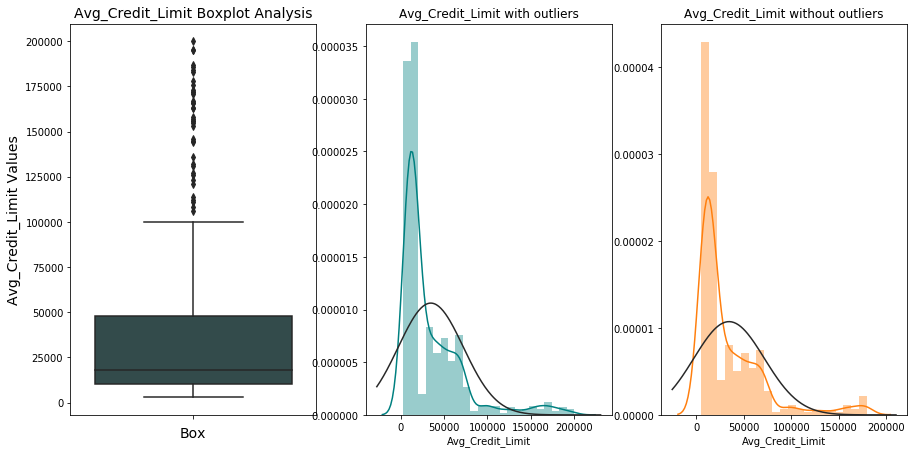

Total_credit_cards column ----------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


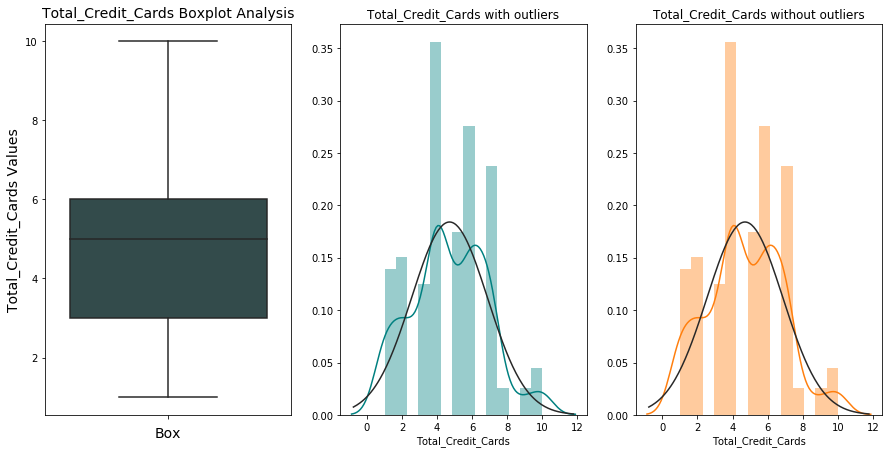

Total_visits_bank column ----------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


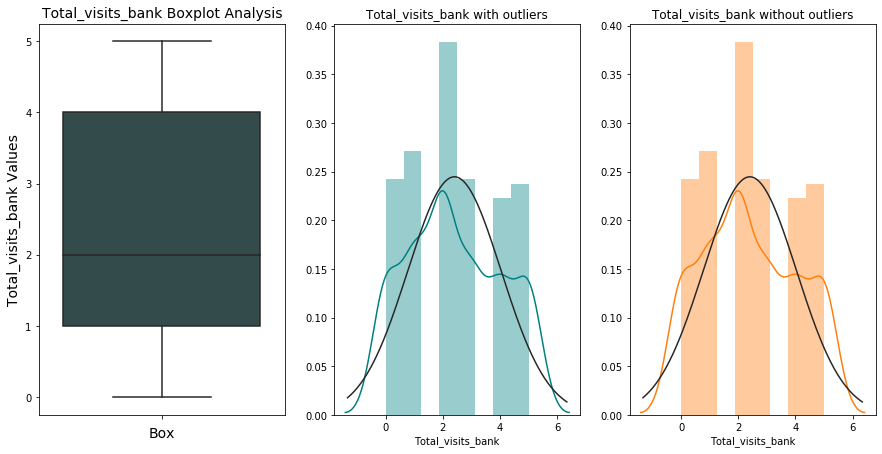

Total_visits_online column ----------------------------------------


37

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,50000,3,0,10,9
4,100000,6,0,12,3
6,100000,5,0,11,2
612,157000,9,1,14,1
613,94000,9,1,11,0


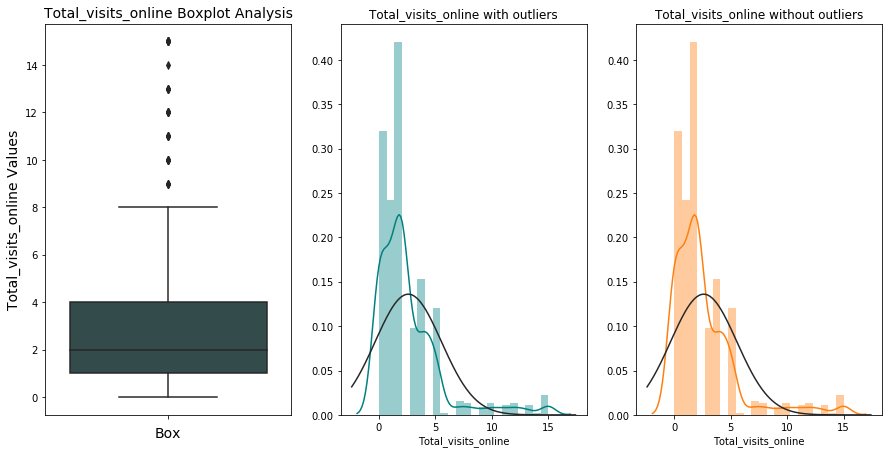

Total_calls_made column ----------------------------------------


0

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


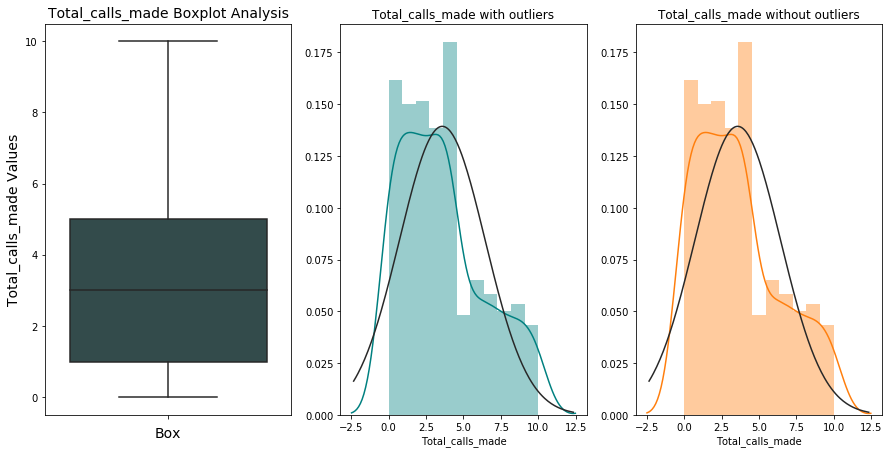

In [29]:

def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)


    return plt.show()

# Outlier, distribution for columns with outliers
boxplotcolumns = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
for cols in boxplotcolumns:
    Q3 = ccdata[cols].quantile(0.75)
    Q1 = ccdata[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*20)
    display(len(ccdata.loc[(ccdata[cols] < (Q1 - 1.5 * IQR)) | (ccdata[cols] > (Q3 + 1.5 * IQR))]), 
            ccdata.loc[(ccdata[cols] < (Q1 - 1.5 * IQR)) | (ccdata[cols] > (Q3 + 1.5 * IQR))].head())
    odp_plots(ccdata, cols)

del cols, IQR, boxplotcolumns

In [30]:
ccdata_im = ccdata.copy(deep = True)
outliers_cols = ['Total_visits_online', 'Avg_Credit_Limit']

for col in outliers_cols:
    Q3 = ccdata_im[col].quantile(0.75)
    Q1 = ccdata_im[col].quantile(0.25)
    IQR = Q3 - Q1
    upper_lim = Q3 + (1.5 * IQR)
    lower_lim = Q1 - (1.5 * IQR)
    ccdata_im.loc[(ccdata_im[col] < lower_lim) | (ccdata_im[col] > upper_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', outliers_cols)

Column for which outliers where removed with upper and lower percentile values: 
 ['Total_visits_online', 'Avg_Credit_Limit']


In [31]:

ccdata_im.isnull().sum()

Avg_Credit_Limit       39
Total_Credit_Cards      0
Total_visits_bank       0
Total_visits_online    37
Total_calls_made        0
dtype: int64

In [32]:
# Using SimpleImputer to fill missing values utilizing median
print('Descriptive Stats before handling outliers: \n', '--'*30)
display(ccdata[outliers_cols].describe().T)

columns = list(ccdata.columns)
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
ccdata_im = pd.DataFrame(impute.fit_transform(ccdata), columns = columns)

print('Descriptive Stats after handling outliers: \n', '--'*30)
display(ccdata_im[outliers_cols].describe().T)


Descriptive Stats before handling outliers: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0


Descriptive Stats after handling outliers: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0


Series([], dtype: float64)

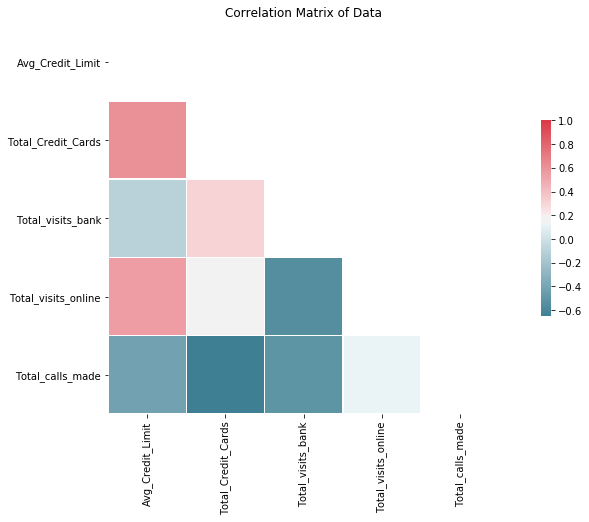

In [33]:
##Multivariate analysis:
correlation_matrix(ccdata_im, threshold = 0.8)


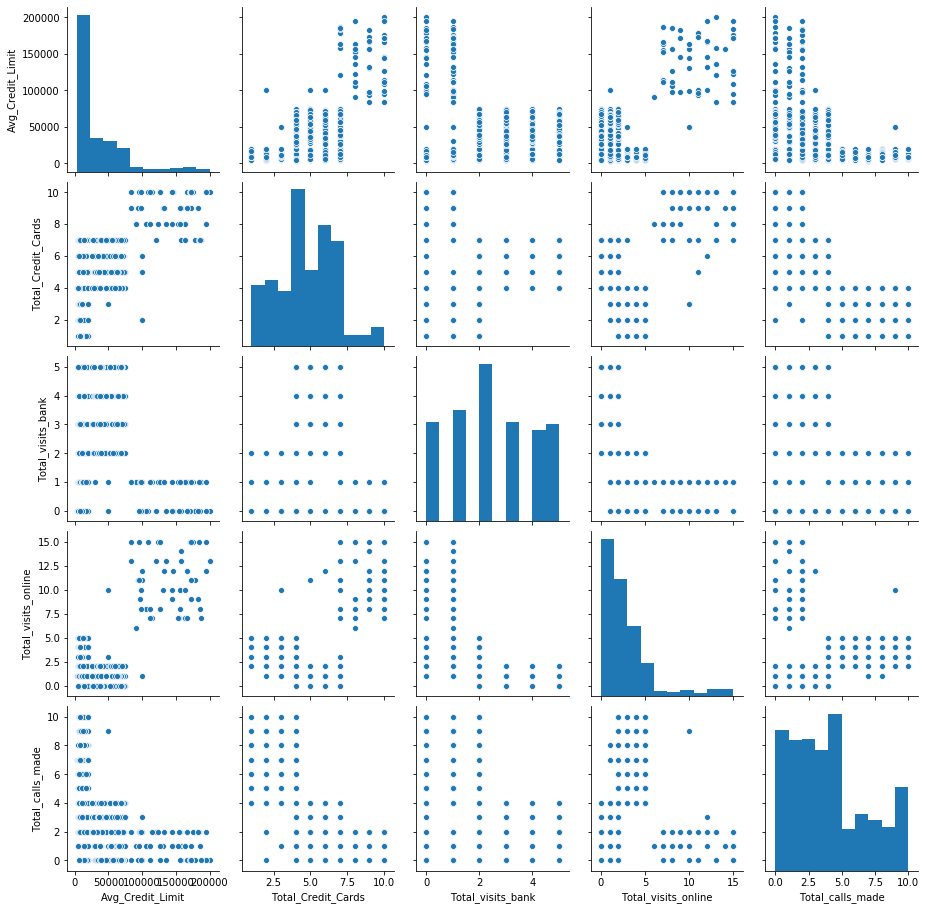

In [34]:
sns.pairplot(ccdata_im[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']])

In [35]:
##PCA
ccdata_scaled_im=ccdata_im.apply(zscore)
ccdata_scaled_im.head(10)
from sklearn.decomposition import PCA
ccdata_scaled_im.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [36]:
var_ratio={}
for n in range(0,4):
    pc=PCA(n_components=n)
    ccdata_pca=pc.fit(ccdata_scaled_im)
    var_ratio[n]=sum(ccdata_pca.explained_variance_ratio_)

In [37]:

pc=PCA(n_components=4)

In [38]:
p=pc.fit(ccdata_scaled_im)

In [39]:
ccdata_scaled_im.shape

(660, 5)

In [40]:

p.explained_variance_

array([2.29029906, 1.87416377, 0.3205531 , 0.27826563])

In [41]:
var_ratio

{0: 0, 1: 0.45736578237079406, 2: 0.8316306088851675, 3: 0.8956440905840075}

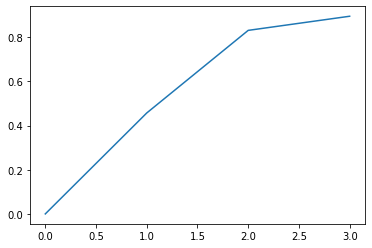

In [42]:
pd.Series(var_ratio).plot()

Observation: 4 components are explaining 89% variance, I could have reduced to 3, but since we have only 4 components, I assume that cost of analysis that included all columns is not that drastic...

In [43]:
##Clustering
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(ccdata_im)
km_4.labels_

array([2, 3, 3, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
pd.Series(km_4.labels_).value_counts()

0    398
3    135
2     93
1     34
dtype: int64

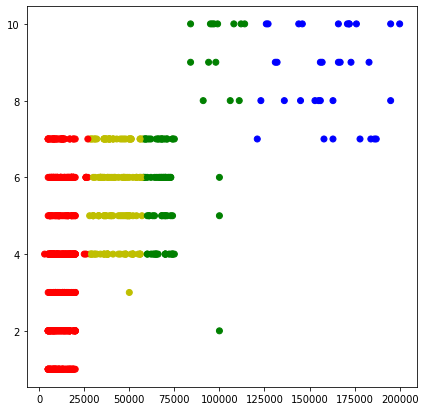

In [45]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(ccdata_im.iloc[:,0],ccdata_im.iloc[:,1],c=label_color)

In [46]:
# inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 7):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

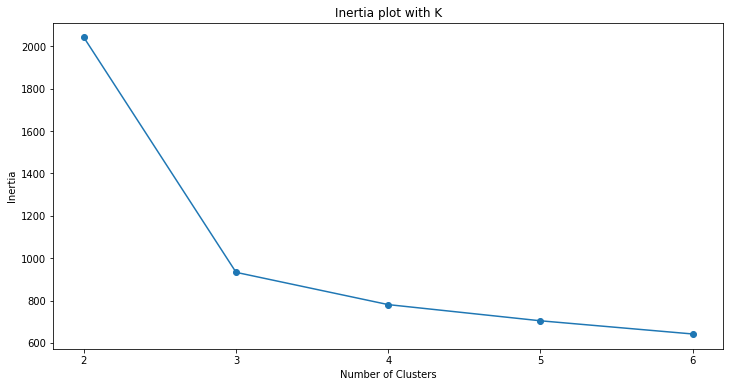

In [47]:
 inertia_plot(KMeans, ccdata_scaled_im)

Observation: looks like we are getting 4 clusters

In [48]:
#Hierarchial clustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [49]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(ccdata_scaled_im, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(ccdata_scaled_im))

c

0.8977080867389372

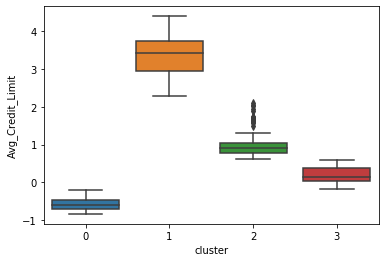

In [50]:
ccdata_scaled_im['cluster'] = km_4.labels_
sns.boxplot(ccdata_scaled_im.cluster,ccdata_scaled_im.Avg_Credit_Limit)

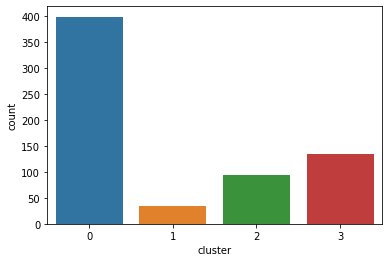

In [51]:
sns.countplot(x='cluster',data=ccdata_scaled_im)

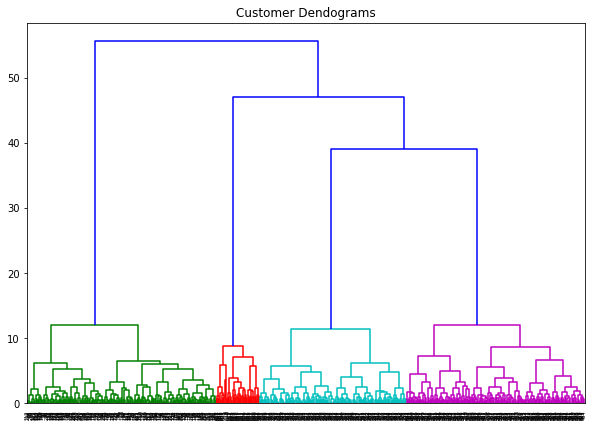

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(ccdata_scaled_im, method='ward'))

In [62]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

X = linkage(ccdata_scaled_im, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(ccdata_scaled_im))

c


0.7543042590846627

In [63]:
## Silhouette score for linkage ="ward"
from sklearn.cluster import AgglomerativeClustering
ac_cluster = AgglomerativeClustering(n_clusters=2,
                                    linkage='ward',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
silhouette_avg

0.5684474910887917

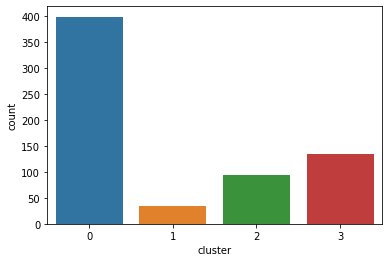

In [64]:
sns.countplot(x='cluster',data=ccdata_scaled_im)

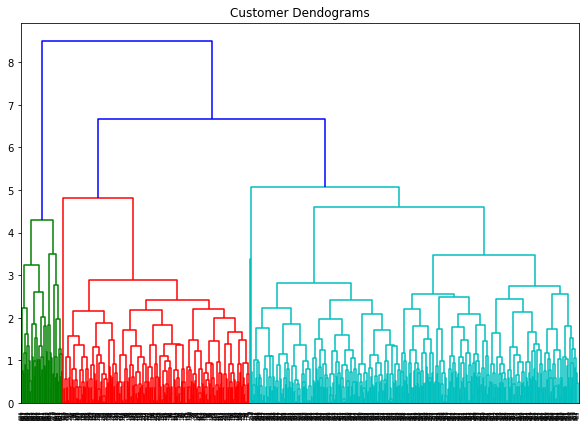

In [65]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(ccdata_scaled_im, method='complete'))

In [66]:
## Silhouette score for linkage ="complete"
from sklearn.cluster import AgglomerativeClustering
ac_cluster = AgglomerativeClustering(n_clusters=2,
                                    linkage='complete',
                                    affinity='euclidean')
cluster_labels = ac_cluster.fit_predict(Z)
silhouette_avg = silhouette_score(Z, cluster_labels)
silhouette_avg

0.5662577304986642

In [58]:
##Kmean Silhouette score
for x in range(2, 5):
    alg = KMeans(n_clusters = x, )
    label = alg.fit_predict(ccdata_scaled_im)
    print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(ccdata_scaled_im, label))

Silhouette-Score for 2 Clusters:  0.4100104616688441
Silhouette-Score for 3 Clusters:  0.4523659830702017
Silhouette-Score for 4 Clusters:  0.5171268996633706


In [60]:

# apply PCA and display clustering metrics
for y in range(2, 5):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(ccdata_scaled_im)
    for x in range(2, 5):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '       Inertia: ',alg.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.49488632628876056        Inertia:  1696.920744687736
Silhouette-Score for 3 Clusters:  0.6260146404135485        Inertia:  618.7408485852244
Silhouette-Score for 4 Clusters:  0.6368318578583829        Inertia:  274.85635643271536

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.4901732313156943        Inertia:  2190.4259214891063
Silhouette-Score for 3 Clusters:  0.5556451445568427        Inertia:  1218.9337794797439
Silhouette-Score for 4 Clusters:  0.6724860110114815        Inertia:  396.196011953675

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.44920292751174573        Inertia:  2401.3608901520133
Silhouette-Score for 3 Clusters:  0.5022786912186576        Inertia:  1367.9259319104788
Silhouette-Score for 4 Clusters:  0.5923502107198291        Inertia:  606.3649560132485



Observation: using 3 PCA with 4 clusters or 2 PCA with 4 clusters will be the best

Observation: seems like in our case KMEANS gives us better scores of appr. 0.67when using PCA 
with 3 components for 4 clusters... Ward and complete linkage hierarchial clustering gave us scores of appr 0.56 for both 
with insignificant improvement with ward linkage. 

Looking at dendograms we can see that hierarchial clustering is very busy in the bottom due to quantity of data points.

Kmeans provides better clustering in this case.

Cophenetic scores were 0.754 for ward linkage and 0.898 for complete linkage, favoring complete linkage

Looking at Kmeans graph, we can see 4 clusters of customers:
    
    1) Low spenders up to 25K
    2) Middle of the road spenders 25K to 55K
    3) High Spenders 55K to 120K
    4) Extreme spenders 120K and above
    
Depending on the risk appetite of the bank, recommendations would be given:
    
    1) include income if possible for better understanding of customers. Simply looking at
        number of credit cards and average credit limit does not give you enough understanding of
        what is going on. For example Extreme spenders may have an income of 1MM and for them, in % 
        credit limit would be less than for someone making 50K but haveng 25 credit limit.
    2) Considering that income is around the same for the given population, I would implement 
        further credit limit increase restrictions to extreme spenders, and would exten promotional deals
        to encourage credit usage to low spenders
    Ethical considerations:
        Depending on situation, as a financial institution we should be aware of taking advantage of
        misinfored or susceptible populations to avoid predatory practices.